In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from fredapi import Fred

In [3]:
df_fed = pd.read_csv("2020-2024fed.csv")
df_sentiment = pd.read_csv("2020-2024sentiment.csv")
df_prices = pd.read_csv("2020-2024prices.csv")
df_speech = pd.read_csv("2020-2024speeches.csv")

In [7]:
# Creazione dizionario contenente date e nome speaker dei discorsi
events = dict(zip(df_fed['date'], df_fed['speaker']))

In [17]:
# Download dati US treasury bond

start_date = '2020-01-01'
end_date = '2024-12-31'

fred = Fred(api_key='6256754e72e4de6660195ad958a7c50c')
data = fred.get_series('DGS10', observation_start=start_date, observation_end=end_date)

# Convertire in DataFrame per una migliore visualizzazione
df_bond = pd.DataFrame(data, columns=['Yield'])
df_bond.index.name = 'Date'

# Interpolazione dati mancanti
df_bond['Yield'] = df_bond['Yield'].interpolate(method = 'linear')


Date
2020-01-17    1.84
2020-01-16    1.81
2020-01-09    1.85
2020-01-08    1.87
2020-02-25    1.33
              ... 
2024-11-08    4.30
2024-12-06    4.15
2024-12-04    4.19
2024-12-03    4.23
2024-12-02    4.19
Name: Yield, Length: 302, dtype: float64


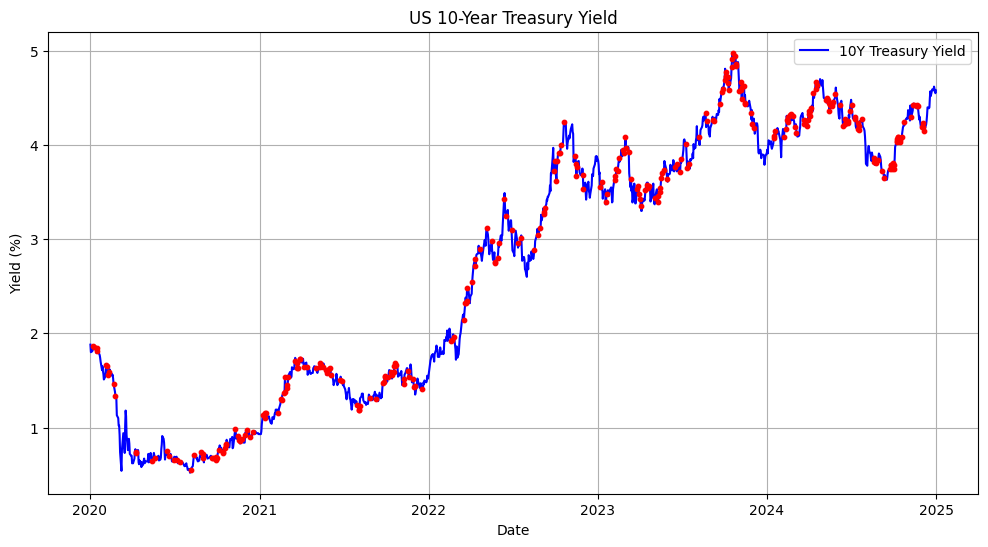

In [31]:
# Converti le date degli eventi in formato datetime
event_dates = pd.to_datetime(list(events.keys()))

missing_dates = [date for date in event_dates if date not in df_bond.index]

# Trova le date che esistono nel DataFrame
valid_event_dates = [date for date in event_dates if date in df_bond.index]

# Estrai i tassi d'interesse solo per le date valide
bond_values = df_bond.loc[valid_event_dates, 'Yield']

# Mostra i valori dei tassi per le date valide
print(bond_values)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_bond.index, df_bond['Yield'], label='10Y Treasury Yield', color='blue')
plt.title('US 10-Year Treasury Yield')
plt.xlabel('Date')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid(True)
plt.scatter(valid_event_dates, bond_values, color = 'red', s=10, zorder = 5, label='Speeches Dates')
plt.show()